In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
import numpy as np

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def createScatterPlot(data, countries, yrs, yTitle = None):
    yrLbl = ['1860-69', '70-79', '80-89', '90-99', '1900-09', '10-19', '20-29', '30-39', '40-49',
         '50-59', '60-69', '70-79', '80-89', '90-99', '2000-09', '10-16']
    fig, ax = plt.subplots(figsize=(18, 12))
    for i in countries:
        ax.scatter(yrs, data[data.Country == i][years].values, label = i)
    if yTitle is not None:
        ax.set_ylabel(yTitle, fontsize=16)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=10, color='r')
    ax.tick_params(which='minor', length=7, color='k')
    ax.set_xticklabels(yrLbl)
    #ax.tick_params(which='both', length=4, color='r')
    plt.legend()
    plt.show()

In [25]:
def createStackedBar(data, countries, yrs, yTitle = None):
    dtPlt = data[data.Country.isin(countries)].fillna(0).T
    yrLbl = ['1860-69', '70-79', '80-89', '90-99', '1900-09', '10-19', '20-29', '30-39', '40-49',
     '50-59', '60-69', '70-79', '80-89', '90-99', '2000-09', '10-16']
    fig, ax = plt.subplots(figsize=(14, 8))
    #dtPlt.loc[yrs].plot(kind='bar', stacked=True, ax=ax, colormap='Paired')
    dtPlt.columns = dtPlt.loc['Country']
    dtPlt.loc[yrs].plot(kind='area', colormap='Paired', linewidth=0, ax=ax)
    if yTitle is not None:
        ax.set_ylabel(yTitle)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=7)
    plt.xticks(range(len(yrLbl)), yrLbl)

In [5]:
tableToSheetmap = {'121': 'Sheet1', '122': 'Sheet2', '123': 'Sheet3', '132': 'Sheet12', '133': 'Sheet13',
                   '134': 'Sheet14', '135': 'Sheet15', '136': 'Sheet16', '138': 'Sheet18', '139': 'Sheet19',
                   '155': 'Sheet35'}

In [6]:
years = ['1860-69', '1870-79', '1880-89', '1890-99', '1900-09', '1910-19', '1920-29', '1930-39', '1940-49',
         '1950-59', '1960-69', '1970-79', '1980-89', '1990-99', '2000-09', '2010-16']

In [28]:
oldWorld = ['France', 'Italy', 'Spain', 'Portugal', 'Greece', 'Austria', 'Hungary', 'Germany',
            'Moldova', 'Georgia', 'Algeria']
newWorld = ['USA', 'Australia', 'Chile', 'Argentina', 'New Zealand', 'South Africa', 'Japan', 'India', 'China']

In [8]:
data = pd.read_excel('GlobalWineMarketAnnual.xlsm', index_col=None, sheet_name=tableToSheetmap['121'], usecols='B:S', skiprows=2)
data.rename(columns={"Unnamed: 0": "Country"}, inplace=True)
data.drop(columns='Unnamed: 1', inplace=True)
data.dropna(subset=['Country'], inplace=True)
data.dropna(how='all', inplace=True)
data.replace('na', np.nan, inplace=True)

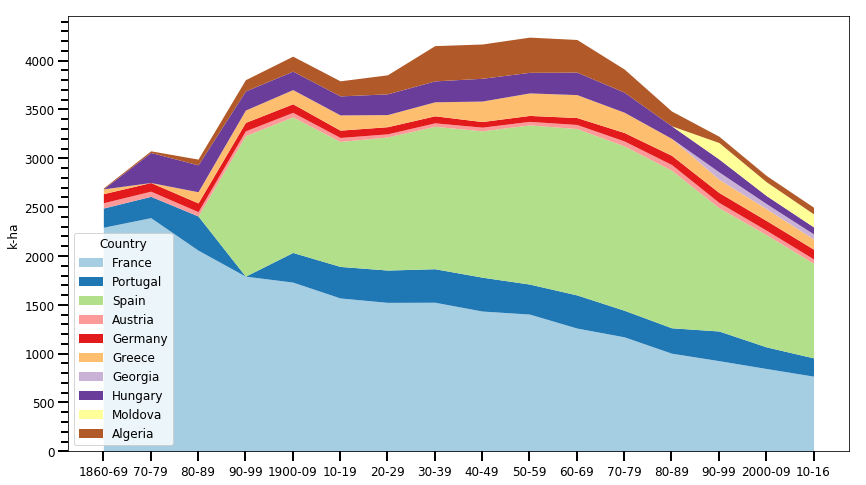

In [29]:
createStackedBar(data, oldWorld, years, yTitle='k-ha')